#### BRCA UMAP, Outlier cut run

From BRCA_02, NaN in subtypes

Loss curve inspections, 6 potential usable embeddings:
    Outlier cut 5k, 15 epochs - super high intial loss
    Outlier cut 5k, 45 epochs - normal looking loss curve * v03
    Outlier cut 10k, 15 epochs - normal looking loss curve
    Outlier cut 10k, 45 epochs - spike then smooth loss curve
    Outlier cut 100k, 30 epochs - normal looking loss curve
    Outlier cut 100k, 45 epochs - small spike then smooth loss curve
    
Note on Casey Green model - plot all gene values, raw vs. decoded for one sample

In [2]:
import umap.umap_ as umap
import glob as glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/cvae_venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-10-27 14:41:19.331768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
%whos

Variable         Type         Data/Info
---------------------------------------
StandardScaler   type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
dec_trn_X        DataFrame                0         1  <...>746 rows x 20531 columns]
dec_tst_X        DataFrame                0         1  <...>249 rows x 20531 columns]
glob             module       <module 'glob' from '/Use<...>3/lib/python3.9/glob.py'>
np               module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd               module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt              module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
umap             module       <module 'umap.umap_' from<...>-packages/umap/umap_.py'>


#### Decoded section, RHS of process flow

In [ ]:
ls ../b_model/results/ # Decoded, fix naming to sort in human-friendly fasion

In [7]:
dec_trn_X = pd.read_csv(
    '../b_model/results/BRCA_5k_outlier_cut_train_45_epochs_100_latent_dim_2022-10-26_1d_model.tsv',
    sep = ',',
    index_col = 0)

In [8]:
dec_trn_X.shape

(746, 20531)

In [9]:
dec_tst_X = pd.read_csv(
    '../b_model/results/BRCA_5k_outlier_cut_test_45_epochs_100_latent_dim_2022-10-26_1d_model.tsv',
    sep = ',',
    index_col = 0)

In [10]:
dec_tst_X.shape

(249, 20531)

#### Raw section, LHS process flow

In [ ]:
ls ../a_data_structure/normalized_data/flat/BR*

In [ ]:
../a_data_structure/normalized_data/flat/BRCA_X_test_flat_5k_otlr_cut_MinMax.tsv
../a_data_structure/normalized_data/flat/BRCA_X_train_flat_5k_otlr_cut_MinMax.tsv
../a_data_structure/normalized_data/flat/BRCA_y_test_flat_5k_otlr_cut_MinMax.tsv # to production
../a_data_structure/normalized_data/flat/BRCA_y_train_flat_5k_otlr_cut_MinMax.tsv # trn y

In [11]:
raw_trn_X = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BRCA_X_train_flat_5k_otlr_cut_MinMax.tsv',
    sep = '\t',
    index_col = 0)

In [12]:
raw_trn_X.shape

(746, 20531)

In [13]:
raw_tst_X = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BRCA_X_test_flat_5k_otlr_cut_MinMax.tsv',
    sep = '\t',
    index_col = 0)

In [14]:
raw_tst_X.shape

(249, 20531)

### UMAP production

#### Raw train X and y concat

In [15]:
trn_y = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BRCA_y_train_flat_5k_otlr_cut_MinMax.tsv', # check
    sep = '\t',
    index_col = 0)

In [16]:
trn_y.shape

(746, 1)

In [17]:
raw_trn_lbld = pd.concat(
    [trn_y,
     raw_trn_X], axis = 1)

In [18]:
del(raw_trn_X)

In [19]:
raw_trn_lbld['Labels'] = raw_trn_lbld['Labels'].astype(str) + '_raw_trn'

#### Raw test X and y concat

In [20]:
tst_y = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BRCA_y_test_flat_5k_otlr_cut_MinMax.tsv', # check
    sep = '\t',
    index_col = 0)

In [21]:
tst_y.shape

(249, 1)

In [22]:
raw_tst_lbld = pd.concat(
    [tst_y,
     raw_tst_X], axis = 1)

In [23]:
del(raw_tst_X)

In [24]:
raw_tst_lbld['Labels'] = raw_tst_lbld['Labels'].astype(str) + '_raw_tst'

#### Add Labels to Decoded, fix header and index on train

In [25]:
col_heads = raw_trn_lbld.columns # one off for both dec

In [ ]:
-----

In [27]:
dec_trn_X.insert(0, 'Labels', list(trn_y.Labels))

In [28]:
dec_trn_X.columns = col_heads

In [29]:
trn_ndx = raw_trn_lbld.index

In [30]:
dec_trn_X.index = trn_ndx

In [31]:
dec_trn_X['Labels'] = dec_trn_X['Labels'].astype(str) + '_dec_trn'

In [ ]:
# Last step, fix the tst dec

In [32]:
dec_tst_X.insert(0, 'Labels', list(tst_y.Labels))

In [33]:
dec_tst_X.columns = col_heads

In [34]:
tst_ndx = raw_tst_lbld.index

In [35]:
dec_tst_X.index = tst_ndx

In [36]:
dec_tst_X['Labels'] = dec_tst_X['Labels'].astype(str) + '_dec_tst'

In [ ]:
# Done with four builds

In [ ]:
# No
# umap_labels = [] # BRCA trn
# for i in unit.Labels:
#     if i == unit.Labels.unique()[0]:
#         umap_labels.append(unit.Labels.unique()[0]+'_'+lbl_set)
#     if i == unit.Labels.unique()[1]:
#         umap_labels.append(unit.Labels.unique()[1]+'_'+lbl_set)
#     if i == unit.Labels.unique()[2]:
#         umap_labels.append(unit.Labels.unique()[2]+'_'+lbl_set)
#     if i == unit.Labels.unique()[3]:
#         umap_labels.append(unit.Labels.unique()[3]+'_'+lbl_set)
# unit.Labels = umap_labels

In [37]:
lbld_full = pd.concat(
    [raw_trn_lbld, raw_tst_lbld, dec_trn_X, dec_tst_X])

In [ ]:
lbld_full

In [39]:
lbld_full.Labels.unique()

array(['BRCA_1_raw_trn', 'BRCA_3_raw_trn', 'BRCA_2_raw_trn',
       'BRCA_4_raw_trn', 'BRCA_1_raw_tst', 'BRCA_3_raw_tst',
       'BRCA_2_raw_tst', 'BRCA_4_raw_tst', 'BRCA_1_dec_trn',
       'BRCA_3_dec_trn', 'BRCA_2_dec_trn', 'BRCA_4_dec_trn',
       'BRCA_1_dec_tst', 'BRCA_3_dec_tst', 'BRCA_2_dec_tst',
       'BRCA_4_dec_tst'], dtype=object)

In [40]:
n_comps = 2
reducer = umap.UMAP(n_components = n_comps)
scaled_data = StandardScaler().fit_transform(lbld_full.iloc[:,1:])
embd = reducer.fit_transform(scaled_data)
embdDF = pd.DataFrame(embd)
embdDF.columns = ['x', 'y']
embdDF.insert(0, 'Labels', list(lbld_full.Labels))

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [41]:
embdDF

,Labels,x,y
0,BRCA_1_raw_trn,-6.190127,1.057458
1,BRCA_1_raw_trn,-4.085931,1.698705
2,BRCA_1_raw_trn,-4.666429,0.890969
3,BRCA_3_raw_trn,-7.225770,3.380611
4,BRCA_3_raw_trn,-7.054543,3.838298
...,...,...,...
1985,BRCA_3_dec_tst,-9.836608,3.039943
1986,BRCA_1_dec_tst,-9.733843,3.178437
1987,BRCA_1_dec_tst,-8.373467,6.302423
1988,BRCA_1_dec_tst,-9.503895,2.889945


In [42]:
len(embdDF.Labels.unique())

16

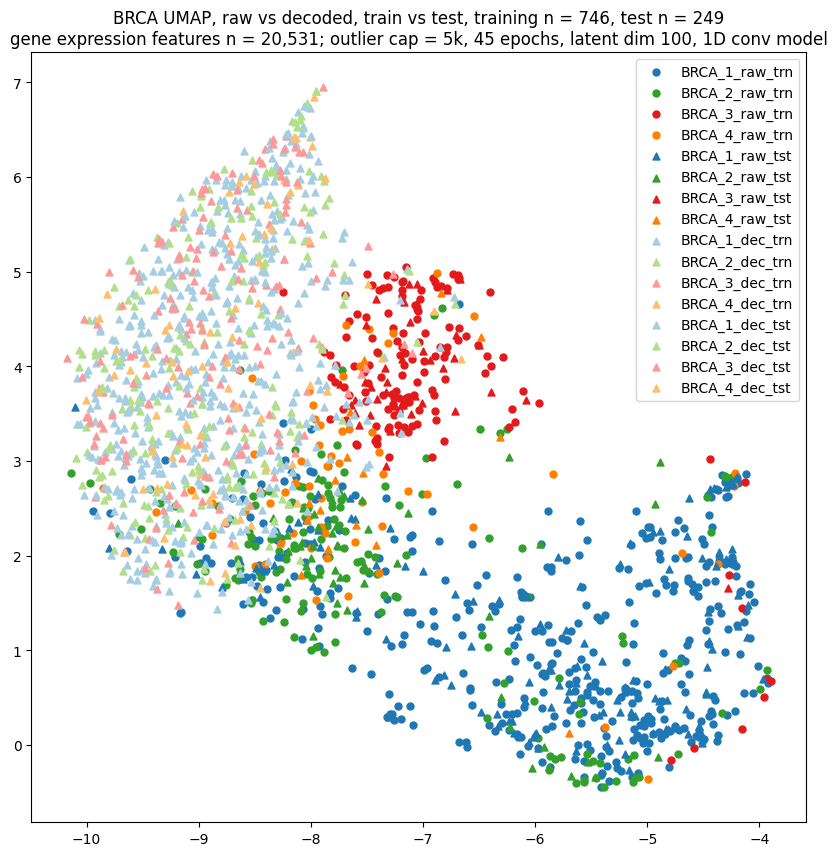

In [47]:
# BRCA
dot_size = 25

fig = plt.figure(figsize = (10, 10))

# raw_trn
plt.scatter(embdDF[embdDF.Labels == 'BRCA_1_raw_trn'].x,
            embdDF[embdDF.Labels == 'BRCA_1_raw_trn'].y,
            s=dot_size, color=plt.cm.Paired(1),
            marker='o', label = 'BRCA_1_raw_trn')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2_raw_trn'].x,
            embdDF[embdDF.Labels == 'BRCA_2_raw_trn'].y,
            s=dot_size, color=plt.cm.Paired(3),
            marker='o', label = 'BRCA_2_raw_trn')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3_raw_trn'].x,
            embdDF[embdDF.Labels == 'BRCA_3_raw_trn'].y,
            s=dot_size, color=plt.cm.Paired(5),
            marker='o', label = 'BRCA_3_raw_trn')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4_raw_trn'].x,
            embdDF[embdDF.Labels == 'BRCA_4_raw_trn'].y,
            s=dot_size, color=plt.cm.Paired(7),
            marker='o', label = 'BRCA_4_raw_trn')

# raw_tst
plt.scatter(embdDF[embdDF.Labels == 'BRCA_1_raw_tst'].x,
            embdDF[embdDF.Labels == 'BRCA_1_raw_tst'].y,
            s=dot_size, color=plt.cm.Paired(1),
            marker='^', label = 'BRCA_1_raw_tst')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2_raw_tst'].x,
            embdDF[embdDF.Labels == 'BRCA_2_raw_tst'].y,
            s=dot_size, color=plt.cm.Paired(3),
            marker='^', label = 'BRCA_2_raw_tst')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3_raw_tst'].x,
            embdDF[embdDF.Labels == 'BRCA_3_raw_tst'].y,
            s=dot_size, color=plt.cm.Paired(5),
            marker='^', label = 'BRCA_3_raw_tst')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4_raw_tst'].x,
            embdDF[embdDF.Labels == 'BRCA_4_raw_tst'].y,
            s=dot_size, color=plt.cm.Paired(7),
            marker='^', label = 'BRCA_4_raw_tst')

# dec_trn
plt.scatter(embdDF[embdDF.Labels == 'BRCA_1_dec_trn'].x,
            embdDF[embdDF.Labels == 'BRCA_1_dec_trn'].y,
            s=dot_size, color=plt.cm.Paired(0),
            marker='^', label = 'BRCA_1_dec_trn')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2_dec_trn'].x,
            embdDF[embdDF.Labels == 'BRCA_2_dec_trn'].y,
            s=dot_size, color=plt.cm.Paired(2),
            marker='^', label = 'BRCA_2_dec_trn')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3_dec_trn'].x,
            embdDF[embdDF.Labels == 'BRCA_3_dec_trn'].y,
            s=dot_size, color=plt.cm.Paired(4),
            marker='^', label = 'BRCA_3_dec_trn')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4_dec_trn'].x,
            embdDF[embdDF.Labels == 'BRCA_4_dec_trn'].y,
            s=dot_size, color=plt.cm.Paired(6),
            marker='^', label = 'BRCA_4_dec_trn')

# dec_dec
plt.scatter(embdDF[embdDF.Labels == 'BRCA_1_dec_tst'].x,
            embdDF[embdDF.Labels == 'BRCA_1_dec_tst'].y,
            s=dot_size, color=plt.cm.Paired(0),
            marker='^', label = 'BRCA_1_dec_tst')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_2_dec_tst'].x,
            embdDF[embdDF.Labels == 'BRCA_2_dec_tst'].y,
            s=dot_size, color=plt.cm.Paired(2),
            marker='^', label = 'BRCA_2_dec_tst')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_3_dec_tst'].x,
            embdDF[embdDF.Labels == 'BRCA_3_dec_tst'].y,
            s=dot_size, color=plt.cm.Paired(4),
            marker='^', label = 'BRCA_3_dec_tst')

plt.scatter(embdDF[embdDF.Labels == 'BRCA_4_dec_tst'].x,
            embdDF[embdDF.Labels == 'BRCA_4_dec_tst'].y,
            s=dot_size, color=plt.cm.Paired(6),
            marker='^', label = 'BRCA_4_dec_tst')

plt.title('BRCA UMAP, raw vs decoded, train vs test,'+
          
          ' training n = '+str(len(raw_trn_lbld))+
          ', test n = '+str(len(raw_tst_lbld))+'\n'+
          'gene expression features n = 20,531; outlier cap = 5k, 45 epochs, latent dim 100, 1D conv model')
          
plt.legend(loc = 'upper right')
plt.savefig('out/'+
            'BRCA_raw_dec_r1.png')

In [ ]:
20 levers, notes

Filter count
Data type